# Applied Machine Learning Project


***made by sahar yamani on 31 Jun 2023*** 

### Main Questions 

1. Which Meals are Preferable in both Types? 
2. Which cofficient causes the most Bad Experience?
3. Does the Influence of rating affects Sales?
4. Which Gender has the Most purchase?
5. More Offers Distribution?

## Import Libraries

In [403]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [404]:
#NLP Libraries
# Cleaning the texts
import re 
import nltk 
nltk.download ('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# for the NLP Testing
from sklearn.ensemble import RandomForestClassifier

# for the NLP visualization
from wordcloud import WordCloud

from sklearn.svm import SVC

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saharay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

In [405]:
df = pd.read_csv('/Users/saharay/Desktop/aml pro/onlinedeliverydata.csv')
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (L

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

## Assisng Dataset

In [407]:
# Copy the Original dataset 
df_food_copy = df.copy()

### Quality Issues

1. Drop uselss column

2. Check Duplication

3. Renaming columns

4. Converting  Datatypes

5. Changing the format


### Tidiness Issues 

1. Merge many columns with reviews

## Wrangling Dataset

#### 1- Drop useless column

In [408]:
df_food_copy.drop(['latitude', 'longitude', 'Pin code', 'Self Cooking', 'Unavailability', 'Unaffordable',
                   'Late Delivery','Delay of delivery person getting assigned',
                   'Delay of delivery person picking up food', 'Influence of time',
                   'Residence in busy location', 'Good Road Condition', 'Low quantity low time', 
                   'Delivery person ability', 'Health Concern'], 
                    axis = 1, inplace = True)

In [409]:
df_food_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Medium (P1)                 388 non-null    object
 8   Medium (P2)                 388 non-null    object
 9   Meal(P1)                    388 non-null    object
 10  Meal(P2)                    388 non-null    object
 11  Perference(P1)              388 non-null    object
 12  Perference(P2)              388 non-null    object
 13  Ease and convenient         388 non-null    object

#### 2- Check null values

In [410]:
df_food_copy.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
Medium (P1)                   0
Medium (P2)                   0
Meal(P1)                      0
Meal(P2)                      0
Perference(P1)                0
Perference(P2)                0
Ease and convenient           0
Time saving                   0
More restaurant choices       0
Easy Payment option           0
More Offers and Discount      0
Good Food quality             0
Good Tracking system          0
Poor Hygiene                  0
Bad past experience           0
Long delivery time            0
Wrong order delivered         0
Missing item                  0
Order placed by mistake       0
Order Time                    0
Maximum wait time             0
Google Maps Accuracy          0
Influence of rating           0
Less Delivery time            0
High Qua

#### 3- Check Duplication

In [411]:
df_food_copy.duplicated().sum()

102

In [412]:
# These are an opinions, not causing any problem
df_food_copy[df_food_copy.duplicated()] 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Poor Hygiene,Bad past experience,Long delivery time,Wrong order delivered,Missing item,Order placed by mistake,Order Time,Maximum wait time,Google Maps Accuracy,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
48,23,Female,Single,Student,No Income,Graduate,3,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Disagree,Disagree,Disagree,Agree,Strongly agree,Neutral,Disagree,Agree,Disagree,Agree,Anytime (Mon-Sun),45 minutes,Agree,Yes,Important,Very Important,Slightly Important,Important,Very Important,Very Important,Very Important,Important,Yes,"Spillage, bad packaging and missing items"
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,Walk-in,Direct call,Dinner,Dinner,Veg foods (Breakfast / Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Neutral,Agree,Neutral,Neutral,Disagree,Weekend (Sat & Sun),15 minutes,Agree,Yes,Important,Important,Moderately Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
68,23,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Neutral,Weekend (Sat & Sun),45 minutes,Neutral,Yes,Important,Important,Moderately Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
77,21,Male,Single,Student,No Income,Graduate,4,Walk-in,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Agree,Strongly disagree,Disagree,Strongly disagree,Weekend (Sat & Sun),30 minutes,Neutral,Yes,Important,Important,Slightly Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
86,24,Male,Single,Student,No Income,Post Graduate,5,Food delivery apps,Direct call,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Agree,Agree,Strongly disagree,Strongly disagree,Strongly disagree,Anytime (Mon-Sun),More than 60 minutes,Neutral,Maybe,Unimportant,Slightly Important,Unimportant,Very Important,Slightly Important,Slightly Important,Slightly Important,Slightly Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Strongly agree,Agree,Agree,Neutral,Agree,Agree,Neutral,Agree,Agree,Agree,Strongly agree,Anytime (Mon-Sun),30 minutes,Disagree,Maybe,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Neutral,Agree,Agree,Weekend (Sat & Sun),45 minutes,Agree,Yes,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,S

#### 4- Renaming columns

In [413]:
df_food_copy = df_food_copy.rename(columns = {"Medium (P1)": "FoodDileveryApp"})
df_food_copy = df_food_copy.rename(columns = {"Medium (P2)": "FoodDirectCall"})
df_food_copy = df_food_copy.rename(columns = {"Perference(P1)": "Cuisine1"})
df_food_copy = df_food_copy.rename(columns = {"Perference(P2)": "Cuisine2"})
df_food_copy = df_food_copy.rename(columns = {"More restaurant choices": "RestaurantChoices"})
df_food_copy = df_food_copy.rename(columns = {"Good Food quality": "FoodQuality"})
df_food_copy = df_food_copy.rename(columns = {"Good Tracking system": "TrackingSystem"})
df_food_copy = df_food_copy.rename(columns = {"Meal(P1)": "TypeMeal1"})
df_food_copy = df_food_copy.rename(columns = {"Meal(P2)": "TypeMeal2"})
df_food_copy = df_food_copy.rename(columns = {"Good Quantity": "FoodQuantity"})
df_food_copy = df_food_copy.rename(columns = {"Good Taste": "Taste"})
df_food_copy = df_food_copy.rename(columns = {"Output": "purchaseAgain"})
df_food_copy = df_food_copy.rename(columns = {"More Offers and Discount": "MoreOffersDiscount"})
df_food_copy = df_food_copy.rename(columns = {"Easy Payment option": "EasyPaymentOption"})
df_food_copy = df_food_copy.rename(columns = {"High Quality of package": "HighQualityOfPackage"})


In [414]:
df_food_copy = df_food_copy.rename(columns = {"Bad past experience": "BadPastExperience"})
df_food_copy = df_food_copy.rename(columns = {"Poor Hygiene": "PoorHygiene"})
df_food_copy = df_food_copy.rename(columns = {"Long delivery time": "LongDeliveryTime"})
df_food_copy = df_food_copy.rename(columns = {"Wrong order delivered": "WrongOrderDelivered"})
df_food_copy = df_food_copy.rename(columns = {"Order placed by mistake": "OrderPlacedByMistake"})
df_food_copy = df_food_copy.rename(columns = {"Marital Status": "MaritalStatus"})


#### 5- Converting Datatypes

In [415]:
df_food_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   MaritalStatus               388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   FoodDileveryApp             388 non-null    object
 8   FoodDirectCall              388 non-null    object
 9   TypeMeal1                   388 non-null    object
 10  TypeMeal2                   388 non-null    object
 11  Cuisine1                    388 non-null    object
 12  Cuisine2                    388 non-null    object
 13  Ease and convenient         388 non-null    object

In [416]:
# Converting object to Int (the OUTPUT column)

def output_to_bi(x):
        if x == 'Yes': return 1
        if x == 'No': return 0
        
df_food_copy['purchaseAgain'] = df_food_copy['purchaseAgain'].apply(output_to_bi)

In [417]:
df_food_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   MaritalStatus               388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   FoodDileveryApp             388 non-null    object
 8   FoodDirectCall              388 non-null    object
 9   TypeMeal1                   388 non-null    object
 10  TypeMeal2                   388 non-null    object
 11  Cuisine1                    388 non-null    object
 12  Cuisine2                    388 non-null    object
 13  Ease and convenient         388 non-null    object

#### 6- Changing the format

In [418]:
# Change to lowercase
df_food_copy['Reviews'] = df_food_copy['Reviews'].apply(str.lower)

In [419]:
# Replacing 
df_food_copy['Reviews'] = df_food_copy.Reviews.str.replace('\n', ' ')
df_food_copy['Reviews'] = df_food_copy.Reviews.str.replace(' ', 'NaN')
df_food_copy['Reviews'] = df_food_copy.Reviews.str.replace('nil', 'NaN')
df_food_copy['Reviews'] = df_food_copy.Reviews.str.replace('none', 'NaN')
df_food_copy['Reviews'] = df_food_copy.Reviews.str.strip()

In [420]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


## Storing Dataset

In [421]:
df_food_copy.to_csv('online_order_amlPRO.csv', index = False)

In [422]:
list(df_food_copy)

['Age',
 'Gender',
 'MaritalStatus',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Family size',
 'FoodDileveryApp',
 'FoodDirectCall',
 'TypeMeal1',
 'TypeMeal2',
 'Cuisine1',
 'Cuisine2',
 'Ease and convenient',
 'Time saving',
 'RestaurantChoices',
 'EasyPaymentOption',
 'MoreOffersDiscount',
 'FoodQuality',
 'TrackingSystem',
 'PoorHygiene',
 'BadPastExperience',
 'LongDeliveryTime',
 'WrongOrderDelivered',
 'Missing item',
 'OrderPlacedByMistake',
 'Order Time',
 'Maximum wait time',
 'Google Maps Accuracy',
 'Influence of rating',
 'Less Delivery time',
 'HighQualityOfPackage',
 'Number of calls',
 'Politeness',
 'Freshness ',
 'Temperature',
 'Good Taste ',
 'FoodQuantity',
 'purchaseAgain',
 'Reviews']

In [423]:
pd.set_option('display.max_columns', None)
df_food_copy.head()

,Age,Gender,MaritalStatus,Occupation,Monthly Income,Educational Qualifications,Family size,FoodDileveryApp,FoodDirectCall,TypeMeal1,TypeMeal2,Cuisine1,Cuisine2,Ease and convenient,Time saving,RestaurantChoices,EasyPaymentOption,MoreOffersDiscount,FoodQuality,TrackingSystem,PoorHygiene,BadPastExperience,LongDeliveryTime,WrongOrderDelivered,Missing item,OrderPlacedByMistake,Order Time,Maximum wait time,Google Maps Accuracy,Influence of rating,Less Delivery time,HighQualityOfPackage,Number of calls,Politeness,Freshness,Temperature,Good Taste,FoodQuantity,purchaseAgain,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Weekend (Sat & Sun),30 minutes,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,1,NaNNaN
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Anytime (Mon-Sun),30 minutes,Neutral,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,1,NaN
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Anytime (Mon-Sun),45 minutes,Strongly Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,1,manyNaNaNaNtimesNaNpaymentNaNgatewaysNaNareNaN...
3,22,Female,Single,Student,No Income,Graduate,6,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Neutral,Anytime (Mon-Sun),30 minutes,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,1,NaN
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Weekend (Sat & Sun),30 minutes,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,1,NaN


#### 1- Merge many columns with purchaseAgain

#### Define#1: since nlp works with only one column, then i will merge many columns with the reviews column

In [424]:
reviews_copy = df_food_copy.copy()

In [425]:
reviews_copy2 = df_food_copy.copy()

In [426]:
combine_column5 = pd.DataFrame(reviews_copy, columns = ['purchaseAgain', 'TypeMeal1'])
combine_column5 

,purchaseAgain,TypeMeal1
0,1,Breakfast
1,1,Snacks
2,1,Lunch
3,1,Snacks
4,1,Lunch
...,...,...
383,1,Dinner
384,1,Lunch
385,1,Snacks
386,1,Lunch


In [427]:
combine_column6 = pd.DataFrame(reviews_copy2, columns = ['purchaseAgain', 'TypeMeal2'])
combine_column6 

,purchaseAgain,TypeMeal2
0,1,Lunch
1,1,Dinner
2,1,Snacks
3,1,Dinner
4,1,Dinner
...,...,...
383,1,Dinner
384,1,Dinner
385,1,Dinner
386,1,Dinner


#### Store Dataset

In [428]:
combine_column5.to_csv('combine_column5.tsv', sep = "\t")

In [429]:
combine_column6.to_csv('combine_column6.tsv', sep = "\t")

## Method Insertion

METHOD USED:         
    1. Natural Processing Language        
    2. Support Vector Machine

### 1. Natural Language Processing

In [430]:
# Importing the dataset
reviews_copy = pd.read_csv('/Users/saharay/Desktop/aml pro/combine_column5.tsv',
                           delimiter = '\t', quoting = 3)

In [431]:
# Importing the dataset
reviews_copy2 = pd.read_csv('/Users/saharay/Desktop/aml pro/combine_column6.tsv',
                           delimiter = '\t', quoting = 3)

In [432]:
reviews_copy.head()

,Unnamed: 0,purchaseAgain,TypeMeal1
0,0,1,Breakfast
1,1,1,Snacks
2,2,1,Lunch
3,3,1,Snacks
4,4,1,Lunch


In [433]:
reviews_copy2.head()

,Unnamed: 0,purchaseAgain,TypeMeal2
0,0,1,Lunch
1,1,1,Dinner
2,2,1,Snacks
3,3,1,Dinner
4,4,1,Dinner


In [434]:
list(reviews_copy)

['Unnamed: 0', 'purchaseAgain', 'TypeMeal1']

In [435]:
list(reviews_copy2)

['Unnamed: 0', 'purchaseAgain', 'TypeMeal2']

In [436]:
reviews_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     388 non-null    int64 
 1   purchaseAgain  388 non-null    int64 
 2   TypeMeal1      388 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.2+ KB


In [437]:
reviews_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     388 non-null    int64 
 1   purchaseAgain  388 non-null    int64 
 2   TypeMeal2      388 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.2+ KB


#### Sentiment Checking

In [438]:
# for review 1 (Meal1)
corpus = [] 
for i in range(0, 388):
    review = re.sub('[^a-zA-Z]', ' ', combine_column5['TypeMeal1'][i] )
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [439]:
# for review 2 (Meal2)
corpus = [] 
for i in range(0, 388):
    review2 = re.sub('[^a-zA-Z]', ' ', combine_column6['TypeMeal2'][i] )
    review2 = review2.lower()
    review2 = review2.split()
    ps = PorterStemmer()
    review2 = [ps.stem(word) for word in review2 if not word in set(stopwords.words('english'))]
    review2 = ' '.join(review2)
    corpus.append(review2)

In [440]:
from sklearn.feature_extraction.text import CountVectorizer
# Creating the bag of words model
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = combine_column5.iloc[:, 1].values

### Visualization

#### 1- Visual of TypeMeal1

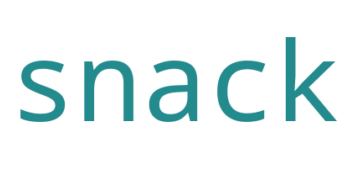

In [441]:
colors = ["#c0abff"]
wordcloud = WordCloud(background_color = "white").generate(review)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0);

#### 2- Visual of TypeMeal2

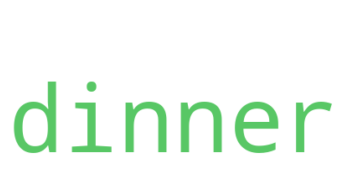

In [442]:
colors = ["#c0abff"]
wordcloud = WordCloud(background_color = "white").generate(review2)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0);

### Testing 

In [443]:
pd.set_option('display.max_columns', None)
df_food_copy.head(1)

,Age,Gender,MaritalStatus,Occupation,Monthly Income,Educational Qualifications,Family size,FoodDileveryApp,FoodDirectCall,TypeMeal1,TypeMeal2,Cuisine1,Cuisine2,Ease and convenient,Time saving,RestaurantChoices,EasyPaymentOption,MoreOffersDiscount,FoodQuality,TrackingSystem,PoorHygiene,BadPastExperience,LongDeliveryTime,WrongOrderDelivered,Missing item,OrderPlacedByMistake,Order Time,Maximum wait time,Google Maps Accuracy,Influence of rating,Less Delivery time,HighQualityOfPackage,Number of calls,Politeness,Freshness,Temperature,Good Taste,FoodQuantity,purchaseAgain,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Weekend (Sat & Sun),30 minutes,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,1,NaNNaN


In [444]:
# Make a new numeric dataframe by converting it
df_test = df_food_copy.copy()

In [445]:
# same (different)
df_test['Gender'].replace({'Male':1, 'Female':2}, inplace = True)
df_test['MaritalStatus'].replace({'Single':1, 'Married':2, 'Prefer not to say':3}, inplace = True)
df_test['Occupation'].replace({'Student':1, 'Employee':2, 'Self Employeed':3, 'House wife':4}, inplace = True)
df_test['Monthly Income'].replace({'No Income':1, 'Below Rs.10000':2, 'More than 50000':3,'10001 to 25000':4,'25001 to 50000':5}, inplace = True)
df_test['Educational Qualifications'].replace({'Post Graduate':1, 'Graduate':2, 'Ph.D':3, 'Uneducated':4, 'School':5}, inplace = True)
#df_test['FoodDileveryApp'].replace({'Food delivery apps':1, 'Walk-in':2}, inplace = True)
#df_test['FoodDirectCall'].replace({'Web browser':1, 'Walk-in':2, 'Direct call':3}, inplace = True)
df_test['TypeMeal1'].replace({'Breakfast':1, 'Snacks':2, 'Lunch':3,'Dinner':4}, inplace = True)
#df_test['TypeMeal2'].replace({'Snacks ':1, 'Lunch':2,'Dinner':3}, inplace = True)
df_test['Cuisine1'].replace({'Non Veg foods (Lunch / Dinner)':1, 'Veg foods (Breakfast / Lunch / Dinner)':2, 'Bakery items (snacks)':3, 'Sweets':4}, inplace = True)
#df_test['Cuisine2'].replace({'Non Veg foods (Lunch / Dinner)':1, 'Veg foods (Breakfast / Lunch / Dinner)':2, 'Bakery items (snacks)':3, 'Ice cream / Cool drinks':4,'Sweets':1}, inplace = True)

# same 
df_test['Ease and convenient'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['Time saving'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['RestaurantChoices'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['EasyPaymentOption'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['MoreOffersDiscount'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['FoodQuality'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
#df_test['Self Cooking'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['PoorHygiene'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['BadPastExperience'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['LongDeliveryTime'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['WrongOrderDelivered'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['Missing item'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['OrderPlacedByMistake'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['Google Maps Accuracy'].replace({'Strongly Agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace = True)
df_test['TrackingSystem'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3, 'Strongly disagree':2, 'Disagree':1}, inplace = True)

df_test['Influence of rating'].replace({'Yes':1, 'Maybe':2, 'No':3}, inplace = True)

# same 
df_test['Freshness '].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2, 'Unimportant':1}, inplace = True)
df_test['Less Delivery time'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['HighQualityOfPackage'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['Number of calls'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['Politeness'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['Temperature'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['Good Taste '].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)
df_test['FoodQuantity'].replace({'Very Important':5, 'Moderately Important':4, 'Important':3,'Slightly Important':2,'Unimportant':1}, inplace = True)

In [446]:
df_test.head(1)

,Age,Gender,MaritalStatus,Occupation,Monthly Income,Educational Qualifications,Family size,FoodDileveryApp,FoodDirectCall,TypeMeal1,TypeMeal2,Cuisine1,Cuisine2,Ease and convenient,Time saving,RestaurantChoices,EasyPaymentOption,MoreOffersDiscount,FoodQuality,TrackingSystem,PoorHygiene,BadPastExperience,LongDeliveryTime,WrongOrderDelivered,Missing item,OrderPlacedByMistake,Order Time,Maximum wait time,Google Maps Accuracy,Influence of rating,Less Delivery time,HighQualityOfPackage,Number of calls,Politeness,Freshness,Temperature,Good Taste,FoodQuantity,purchaseAgain,Reviews
0,20,2,1,1,1,1,4,Food delivery apps,Web browser,1,Lunch,1,Bakery items (snacks),3,3,3,3,3,3,3,3,3,4,4,4,4,Weekend (Sat & Sun),30 minutes,3,1,4,4,4,4,4,4,4,4,1,NaNNaN


In [447]:
df_test.drop(['Order Time', 'Maximum wait time', 'FoodDirectCall', 
'Cuisine2', 'TypeMeal2', 'FoodDileveryApp'], axis = 1, inplace = True)

In [448]:
df_test.drop(['Reviews'], axis = 1, inplace = True)

In [449]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int64
 2   MaritalStatus               388 non-null    int64
 3   Occupation                  388 non-null    int64
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int64
 6   Family size                 388 non-null    int64
 7   TypeMeal1                   388 non-null    int64
 8   Cuisine1                    388 non-null    int64
 9   Ease and convenient         388 non-null    int64
 10  Time saving                 388 non-null    int64
 11  RestaurantChoices           388 non-null    int64
 12  EasyPaymentOption           388 non-null    int64
 13  MoreOffersDiscount          388 non-null    int64
 14  FoodQualit

In [450]:
df_test.to_csv('cleaned_numeric.csv', index = False)

In [451]:
x = df_test.iloc[:,[2,3]].values  
y = df_test.iloc[:,-1].values  

In [452]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [453]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [454]:
# Fitting Random Forest classifier to the Training set
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', 
                                    random_state = 0)
classifier.fit(x_train, y_train);

In [455]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [456]:
# Drop a row since there were an issues
#df_test.drop([310, 291], axis=0, inplace=True)

In [457]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3 21]
 [ 3 70]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


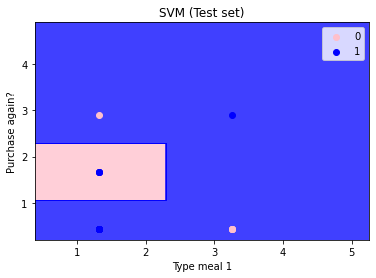

In [458]:
# Visualising the Test set results for 'Polynomial' Kernel
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() + 1, stop = x_set[:, 0].max() + 2, step = 0.01),
                     np.arange(start = x_set[:, 1].min() + 1, stop = x_set[:, 1].max() + 2, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('pink', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Type meal 1')
plt.ylabel('Purchase again?')
plt.legend();

In [459]:
print("The Accuracy of the SVM Classifier:", metrics.accuracy_score(y_test, y_pred))

The Accuracy of the SVM Classifier: 0.7525773195876289


### 2. Support Vector Machine

In [460]:
# Take a copy first
df_svm = df_food_copy.copy()

In [461]:
svm_column = pd.DataFrame(df_svm, columns = ['BadPastExperience',
                                             'PoorHygiene','LongDeliveryTime',
                                             'WrongOrderDelivered','OrderPlacedByMistake'])
svm_column.head()

,BadPastExperience,PoorHygiene,LongDeliveryTime,WrongOrderDelivered,OrderPlacedByMistake
0,Neutral,Neutral,Agree,Agree,Agree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,Agree,Agree,Agree,Strongly agree,Neutral
3,Disagree,Agree,Agree,Disagree,Neutral
4,Strongly agree,Agree,Strongly agree,Neutral,Disagree


In [462]:
#show the value in the data frame and count it 
print(svm_column.BadPastExperience.value_counts())
print(svm_column.PoorHygiene.value_counts())
print(svm_column.LongDeliveryTime.value_counts())
print(svm_column.WrongOrderDelivered.value_counts())
print(svm_column.OrderPlacedByMistake.value_counts());

Disagree             143
Agree                 99
Neutral               85
Strongly agree        31
Strongly disagree     30
Name: BadPastExperience, dtype: int64
Disagree             112
Agree                110
Neutral               88
Strongly agree        52
Strongly disagree     26
Name: PoorHygiene, dtype: int64
Agree                185
Disagree             108
Neutral               46
Strongly agree        42
Strongly disagree      7
Name: LongDeliveryTime, dtype: int64
Disagree             129
Agree                 91
Neutral               65
Strongly agree        53
Strongly disagree     50
Name: WrongOrderDelivered, dtype: int64
Disagree             126
Strongly disagree     87
Agree                 69
Neutral               65
Strongly agree        41
Name: OrderPlacedByMistake, dtype: int64


In [463]:
#now we gonna replace the values by order to make the SVM deal with it better #
svm_column['PoorHygiene'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace=True)
svm_column['LongDeliveryTime'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace=True)
svm_column['WrongOrderDelivered'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace=True)
svm_column['OrderPlacedByMistake'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace=True)
svm_column['BadPastExperience'].replace({'Strongly agree':5, 'Agree':4, 'Neutral':3,'Strongly disagree':2,'Disagree':1}, inplace=True)

### Visualization

#### 1- Correlation coffiecint

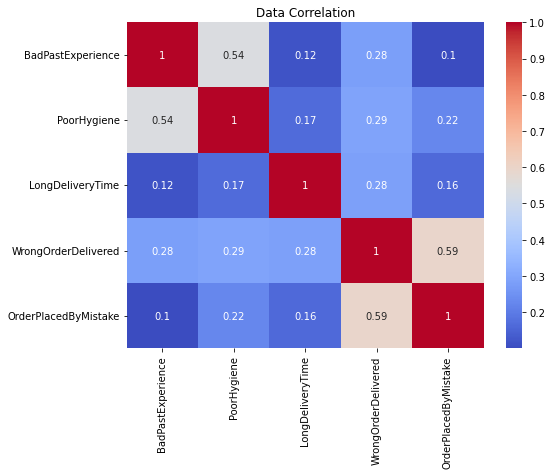

In [464]:
# Visual of corrlation cofficeint to check who the most causes of all attribute 
#(using heatmap)
correlation = svm_column.corr()

plt.figure (figsize = (8, 6))
ax = sb.heatmap(correlation, annot = True, cmap = "coolwarm")
ax.set_title("Data Correlation");

since the visual shows do not have that much correlation.                                    then we should implement another visual to see if the result still the same or not.

#### 2- Polynomial Kernel Visual

In [465]:
#Spliting the data set 
# use iloc method to select column by number
X = svm_column.iloc[:,[2,3]].values  
Y = svm_column.iloc[:,-1].values  

In [466]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [467]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [468]:
# best kernel type
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, Y_train);

In [469]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [470]:
classifier.support_vectors_

array([[ 0.63922222,  0.23357157],
       [ 1.35191827,  0.23357157],
       [-1.49886591, -0.46714315],
       [ 0.63922222,  0.23357157],
       [-0.07347382,  0.23357157],
       [ 1.35191827,  0.23357157],
       [-1.49886591,  0.23357157],
       [ 0.63922222,  0.23357157],
       [ 0.63922222, -0.46714315],
       [ 0.63922222,  0.9342863 ],
       [ 1.35191827, -1.16785787],
       [-1.49886591,  0.9342863 ],
       [ 0.63922222, -0.46714315],
       [-1.49886591, -1.16785787],
       [-1.49886591, -1.16785787],
       [ 0.63922222, -1.16785787],
       [-1.49886591,  0.23357157],
       [ 0.63922222, -1.16785787],
       [ 1.35191827, -0.46714315],
       [-1.49886591, -1.16785787],
       [ 0.63922222, -1.16785787],
       [ 1.35191827,  0.23357157],
       [ 0.63922222,  0.9342863 ],
       [-1.49886591, -1.16785787],
       [ 1.35191827,  1.63500102],
       [ 0.63922222, -1.16785787],
       [ 0.63922222, -1.16785787],
       [-1.49886591,  0.9342863 ],
       [ 1.35191827,

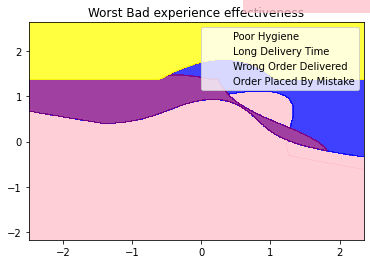

In [471]:
# Visualising the Test set results for 'Polynomial' Kernel
color = ['#4b3296']
sb.set_palette(sb.color_palette(color))

from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'blue', 'purple', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j, q, p in enumerate(np.unique(y_set)):
#  plt.subplot(X_set[y_set == j, 0], X_set[y_set == j, 1]
#             c = ListedColormap(('pink', 'blue','purple', 'green'))(i), label = j)

plt.title('Worst Bad experience effectiveness')
plt.legend(['Poor Hygiene', 'Long Delivery Time', 'Wrong Order Delivered', 'Order Placed By Mistake']);

Order from the worst:       
Order Placed By Mistake > blue 0.1   
Wrong Order Delivered > purple 0.12          
Long Delivery Time > yellow 0.28      
Poor Hygiene > pink 0.54

### Testing 

In [472]:
from sklearn.cluster import KMeans

In [473]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1550)
X = cv.fit_transform(corpus).toarray()
Y = df_test.iloc[:, 1].values

In [474]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [475]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf',random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [476]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  1]
 [50  4]]


In [477]:
X = df_test.iloc[:,[3, 4]].values

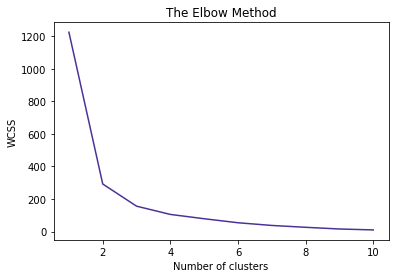

In [478]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [479]:
# Training the K-Means model on dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
Y_kmeans = kmeans.fit_predict(x)

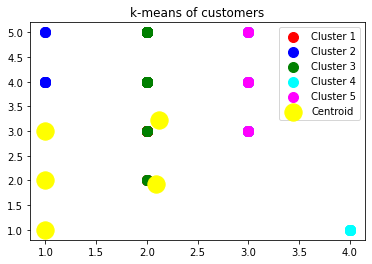

In [480]:
plt.scatter(X[Y_kmeans == 0,0],X[Y_kmeans==0,1], s= 100, c ='red', label = 'Cluster 1')
plt.scatter(X[Y_kmeans == 1,0],X[Y_kmeans==1,1], s= 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[Y_kmeans == 2,0],X[Y_kmeans==2,1], s= 100, c ='green', label = 'Cluster 3')
plt.scatter(X[Y_kmeans == 3,0],X[Y_kmeans==3,1], s= 100, c ='cyan', label = 'Cluster 4')
plt.scatter(X[Y_kmeans == 4,0],X[Y_kmeans==4,1], s= 100, c ='magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroid')
plt.title('k-means of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend();

In [481]:
print("The Accuracy of the Cluster Classifier:", metrics.accuracy_score(Y_test, Y_pred))

The Accuracy of the Cluster Classifier: 0.5641025641025641


## Visualization

#### 3- Does the Influence of rating affects Sales?


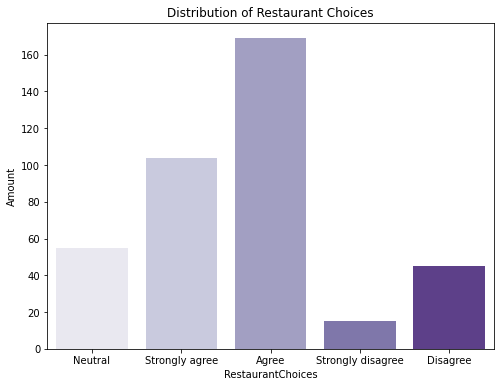

In [482]:
# countplot method
#color = ['#4b3296']
#sb.set_palette(sb.color_palette(color))

fig = plt.figure(figsize = (8, 6))
sb.countplot(x = 'RestaurantChoices', data = df_food_copy, palette = 'Purples')
plt.title('Distribution of Restaurant Choices')
plt.ylabel('Amount');

#### 4- Which Gender has the Most purchase?

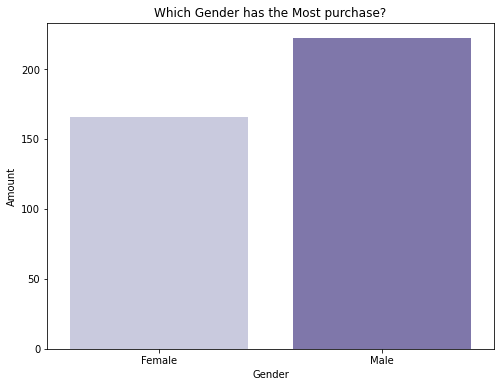

In [485]:
# countplot method
#color = ['#4b3296']
#sb.set_palette(sb.color_palette(color))

fig = plt.figure(figsize = (8, 6))
sb.countplot(x = 'Gender', data = df_food_copy, palette = 'Purples')
plt.title('Which Gender has the Most purchase?')
plt.ylabel('Amount');

#### 5- More Offers Distribution 

/Users/saharay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


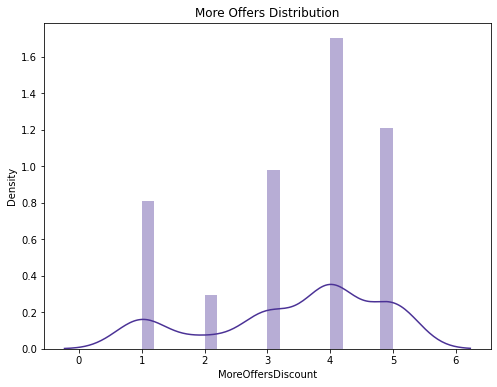

In [486]:
color = ['#4b3296']
sb.set_palette(sb.color_palette(color))

fig = plt.figure(figsize = (8, 6))
sb.distplot(df_test['MoreOffersDiscount'], bins = 20)
plt.title('More Offers Distribution')
plt.xlabel('MoreOffersDiscount');